# Homework 3: Reproducibility in Climate Studies

* **Statistics 159/259, Spring 2022**
* **Due 03/23/2023, 23:59PM PT**
* Prof. F. Pérez and GSI F. Sapienza, Department of Statistics, UC Berkeley.
* This assignment is worth a maximum of **50 points**.
* Assignment type: **group homework assignment** (Check on Ed Discussion about group's assignments).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_17562/187724789.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

Subset all the data to just the West Coast region

In [3]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

### Question 6 [10 points]

Reproduce one of the images in Figure 3. 

Replication of graph A

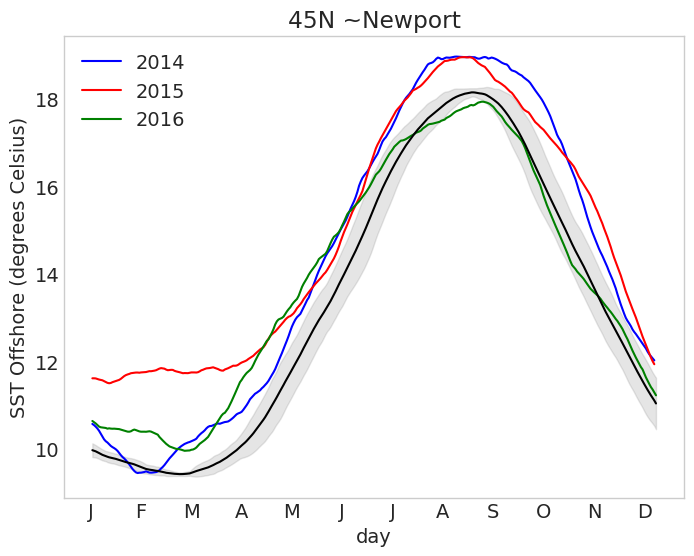

In [5]:
q6 = ds
q6.coords['day'] = q6.time.dt.dayofyear
q6 = q6.assign({'cel_sst': ds.analysed_sst - 273.15})

lat, lon = 45, -127.3163

q6 = q6.sel(lat=lat, lon=lon, method='nearest')

q6.sel(time = "2014").cel_sst.rolling(time=30, center=True).mean().plot(x='day', color='blue');

q6.sel(time = "2015").cel_sst.rolling(time=30, center=True).mean().plot(x='day', color='red');

q6.sel(time = "2016").cel_sst.rolling(time=30, center=True).mean().plot(x='day', color ='green');

day_mean = q6.groupby(q6.day).mean()
day_mean.cel_sst.rolling(day=30, center=True).mean().plot(x='day', color ='black')


q6_mean = day_mean.cel_sst.rolling(day=30, center=True).mean()
q6_sd = day_mean.cel_sst.rolling(day=30, center=True).std()

q6_days = day_mean.assign({'cel_sst_plus_1sd': q6_mean + q6_sd, 'cel_sst_minus_1sd': q6_mean - q6_sd})
plt.fill_between(q6_days.day, q6_days.cel_sst_minus_1sd, q6_days.cel_sst_plus_1sd, alpha=0.2, color='tab:gray');

plt.title('45N ~Newport')
plt.legend({'2014': 'blue', '2015': 'red', '2016': 'green'})
plt.ylabel('SST Offshore (degrees Celsius)')
plt.xticks(np.arange(15, 346, 30), ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
plt.grid(b=None);